In [8]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf

from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
from PIL import Image

In [10]:
X = []
Y = []
count = 0
count1 = 0

for i in tqdm(glob('train/Open_Eyes/*')):
    count = count + 1
    temp = np.array(Image.open(i).resize((64,64)))
    X.append(temp)
    Y.append(1)


for i in tqdm(glob('train/Closed_Eyes/*')):
  count1 = count1 + 1
  temp = np.array(Image.open(i).resize((64,64)))
  X.append(temp)
  Y.append(0)

print(count)
print(count1)

100%|██████████| 1430/1430 [00:00<00:00, 2224.94it/s]

1440
1430


In [11]:
print(count + count1)


2870


In [12]:
X = np.array(X)
X = X/255.0
Y = np.array(Y)

In [13]:
X = np.expand_dims(X,-1)

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D,Dropout, Flatten

model = tf.keras.models.Sequential([
      Input(shape=(64, 64, 1)),

      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu'),
      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu'),
      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Flatten(),
      Dense(units  = 256, activation = 'relu', use_bias=False),
      BatchNormalization(),

      Dense(units = 128, use_bias=False, activation = 'relu'),

      Dense(units = 84, use_bias=False, activation = 'relu'),
      BatchNormalization(),
      Dropout(0.3),

      Dense(units = 1, activation = 'sigmoid')
  ])

In [16]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [18]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='bestModel.h5',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose =1)
model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=32, callbacks=callback)

Epoch 1/10
58/58 [==============================] - ETA: 0s - loss: 0.0518 - accuracy: 0.9831
Epoch 1: val_loss improved from inf to 0.64864, saving model to bestModel.h5
58/58 [==============================] - 65s 1s/step - loss: 0.0518 - accuracy: 0.9831 - val_loss: 0.6486 - val_accuracy: 0.5196
Epoch 2/10
58/58 [==============================] - ETA: 0s - loss: 0.0369 - accuracy: 0.9891
Epoch 2: val_loss did not improve from 0.64864
58/58 [==============================] - 62s 1s/step - loss: 0.0369 - accuracy: 0.9891 - val_loss: 0.9506 - val_accuracy: 0.5261
Epoch 3/10
58/58 [==============================] - ETA: 0s - loss: 0.0154 - accuracy: 0.9956
Epoch 3: val_loss did not improve from 0.64864
58/58 [==============================] - 59s 1s/step - loss: 0.0154 - accuracy: 0.9956 - val_loss: 0.8987 - val_accuracy: 0.6152
Epoch 4/10
58/58 [==============================] - ETA: 0s - loss: 0.0175 - accuracy: 0.9951
Epoch 4: val_loss improved from 0.64864 to 0.53832, saving model t

In [19]:
model.evaluate(x_test, y_test)

18/18 [==============================] - 4s 217ms/step - loss: 0.0393 - accuracy: 0.9843


[0.0392717607319355, 0.9843205809593201]

1/1 [==============================] - 0s 31ms/step


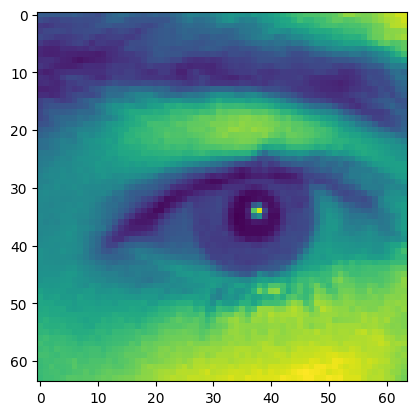

Open
1/1 [==============================] - 0s 29ms/step


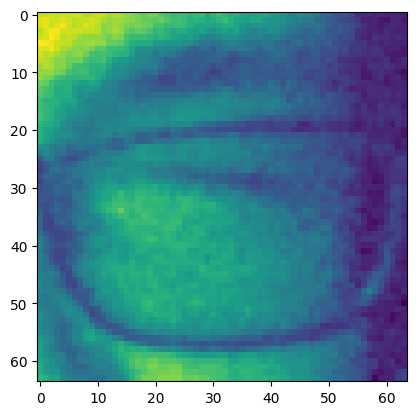

Closed
1/1 [==============================] - 0s 36ms/step


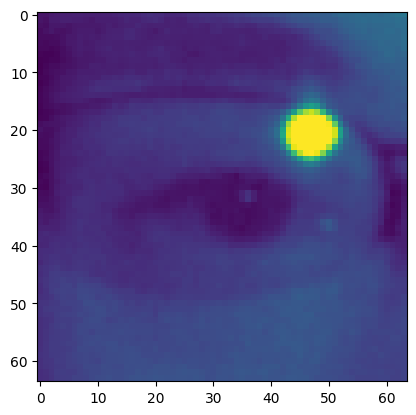

Open
1/1 [==============================] - 0s 30ms/step


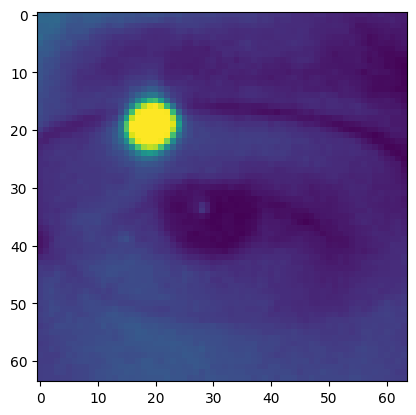

Open
1/1 [==============================] - 0s 37ms/step


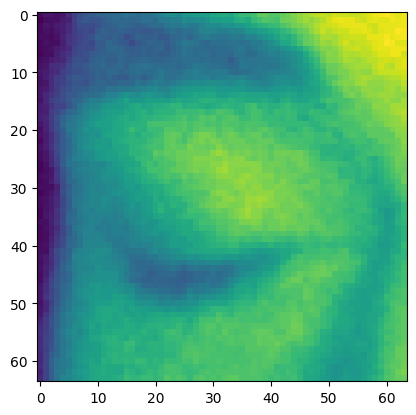

Closed
1/1 [==============================] - 0s 31ms/step


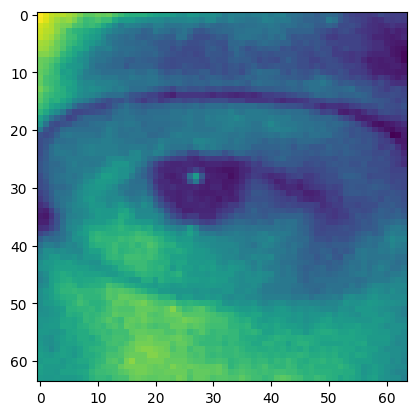

Open
1/1 [==============================] - 0s 29ms/step


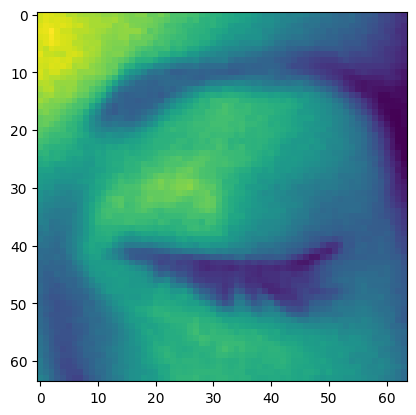

Closed
1/1 [==============================] - 0s 28ms/step


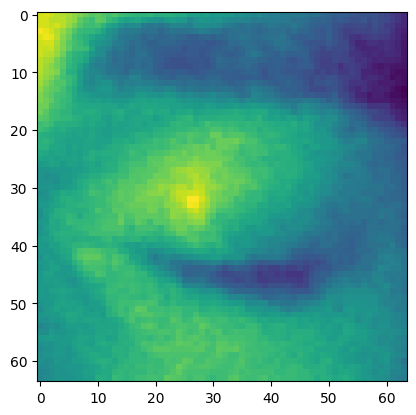

Closed
1/1 [==============================] - 0s 30ms/step


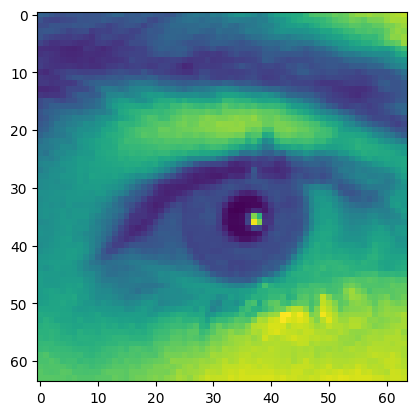

Open
1/1 [==============================] - 0s 35ms/step


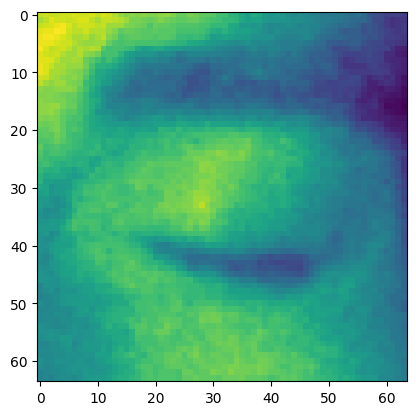

Closed


In [21]:
for i in x_test[0:10]:
    result = model.predict(np.expand_dims(i,0))
    plt.imshow(i)
    plt.show()

    if result > 0.5:
        print('Open')
    else:
        print("Closed")

18/18 [==============================] - 8s 445ms/step


Text(0.5, 25.722222222222214, 'Actual')

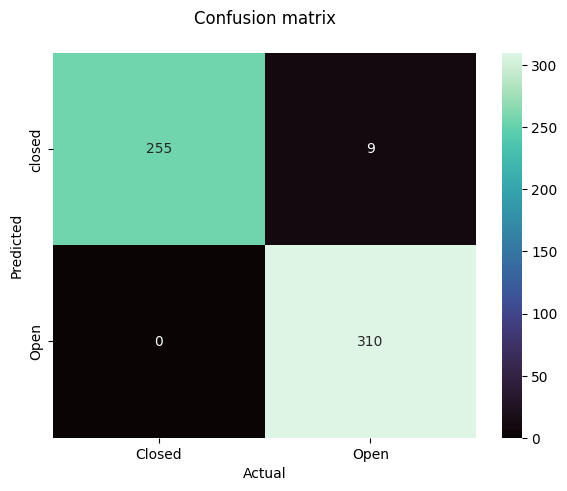

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(15, 5))

preds = model.predict(x_test)
preds = (preds >= 0.5).astype(np.int32)
cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['closed', 'Open'], columns=['Closed', 'Open'])
plt.subplot(121)
plt.title("Confusion matrix\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="mako")
plt.ylabel("Predicted")
plt.xlabel("Actual")